In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from google.colab.patches import cv2_imshow
from tensorflow.keras.layers import Dense,Conv2D,UpSampling2D,MaxPool2D,Flatten,Reshape,Input,BatchNormalization,AveragePooling2D
from tensorflow.keras.models import Sequential,Model
%matplotlib inline

In [2]:
(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [20]:
X_test.shape

(10000, 32, 32, 3)

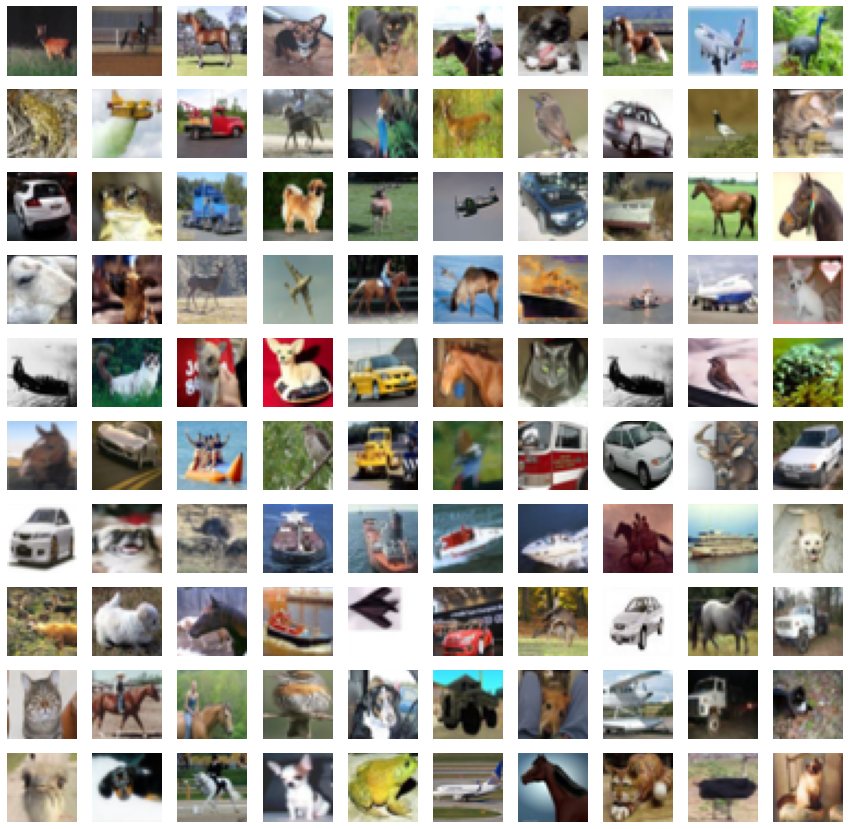

In [4]:
_,axes=plt.subplots(10,10,figsize=(15,15))
axes=axes.ravel()
for i in range(100):
    axes[i].imshow(X_train[np.random.randint(0,4999)])
    axes[i].axis('off')

In [5]:
X_train.min(),X_train.max()

(0, 255)

In [6]:
X_train=X_train/255

In [7]:
X_train.min(),X_train.max()

(0.0, 1.0)

In [41]:
X_test=X_test/255

In [8]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPool2D(padding='same'))
model.add(Conv2D(16,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(padding='same'))
model.add(Conv2D(8,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(padding='same'))
model.add(Conv2D(8,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Flatten())
model.add(Reshape((4,4,8)))
model.add(Conv2D(8,kernel_size=(3,3),activation='relu',padding='same'))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(8,kernel_size=(3,3),activation='relu',padding='same'))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(16,kernel_size=(3,3),activation='relu',padding='same'))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(16,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(3,kernel_size=(3,3),activation='sigmoid',padding='same'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 8)           1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           5

In [11]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(X_train,X_train,epochs=50,batch_size=32)

Epoch 1/50
1563/1563 [==============================] - 41s 5ms/step - loss: 0.6146 - accuracy: 0.4890
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5861 - accuracy: 0.6158
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5819 - accuracy: 0.6342
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5801 - accuracy: 0.6442
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5784 - accuracy: 0.6652
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5767 - accuracy: 0.6776
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5766 - accuracy: 0.6856
Epoch 8/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5748 - accuracy: 0.6907
Epoch 9/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5754 - accuracy: 0.6954
Epoch 10/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.57

In [15]:
encoder_model=Model(model.input,model.get_layer('flatten').output)
encoder_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 8)           1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0   

In [16]:
decoder_model_input=Input(shape=(128,))
decoder_model=model.layers[8](decoder_model_input)
decoder_model=model.layers[9](decoder_model)
decoder_model=model.layers[10](decoder_model)
decoder_model=model.layers[11](decoder_model)
decoder_model=model.layers[12](decoder_model)
decoder_model=model.layers[13](decoder_model)
decoder_model=model.layers[14](decoder_model)
decoder_model=model.layers[15](decoder_model)
decoder_model=model.layers[16](decoder_model)

In [17]:
decoder_model=Model(decoder_model_input,decoder_model)
decoder_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128)]             0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 16)        1168

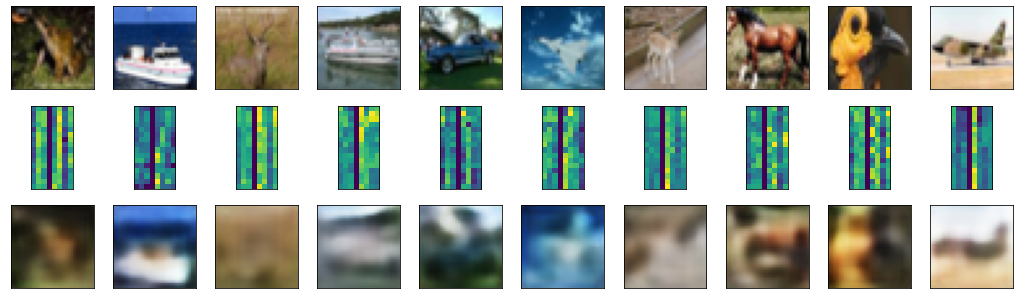

In [42]:
indices=np.random.randint(0,9999,size=10)
plt.figure(figsize=(18,18))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.imshow(X_test[indices[i]])
  plt.xticks(())
  plt.yticks(())

  plt.subplot(10,10,10+i+1)
  pred=encoder_model.predict(np.expand_dims(X_test[indices[i]],axis=0))
  plt.imshow(pred.reshape(16,8))
  plt.xticks(())
  plt.yticks(())

  plt.subplot(10,10,20+i+1)
  plt.imshow(decoder_model.predict(pred)[0])
  plt.xticks(())
  plt.yticks(())
  

## Lets train for few more epochs

In [43]:
model.fit(X_train,X_train,epochs=50,batch_size=32)

Epoch 1/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5703 - accuracy: 0.7324
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5703 - accuracy: 0.7320
Epoch 3/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.5703 - accuracy: 0.7323
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5702 - accuracy: 0.7327
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5702 - accuracy: 0.7321
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5702 - accuracy: 0.7320
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5701 - accuracy: 0.7330
Epoch 8/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5701 - accuracy: 0.7328
Epoch 9/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5701 - accuracy: 0.7335
Epoch 10/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.570

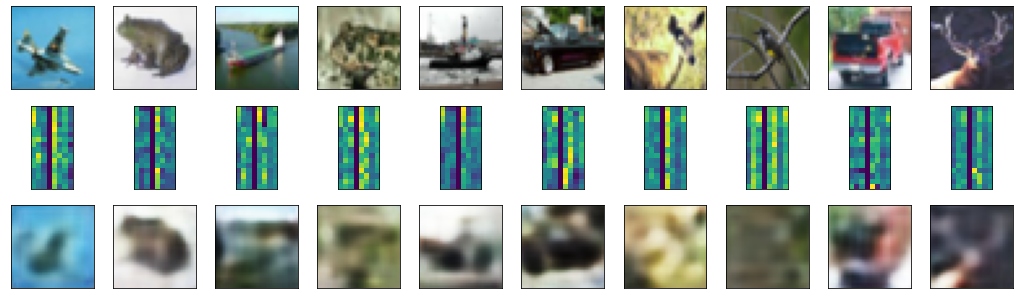

In [45]:
indices=np.random.randint(0,9999,size=10)
plt.figure(figsize=(18,18))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.imshow(X_test[indices[i]])
  plt.xticks(())
  plt.yticks(())

  plt.subplot(10,10,10+i+1)
  pred=encoder_model.predict(np.expand_dims(X_test[indices[i]],axis=0))
  plt.imshow(pred.reshape(16,8))
  plt.xticks(())
  plt.yticks(())

  plt.subplot(10,10,20+i+1)
  plt.imshow(decoder_model.predict(pred)[0])
  plt.xticks(())
  plt.yticks(())
  

In [95]:
model_new=Sequential()
model_new.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model_new.add(BatchNormalization())
model_new.add(AveragePooling2D(strides=(2,2),padding='same'))

model_new.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model_new.add(BatchNormalization())
model_new.add(AveragePooling2D(strides=(2,2),padding='same'))

model_new.add(Conv2D(16,kernel_size=(3,3),activation='relu',padding='same'))
model_new.add(BatchNormalization())
model_new.add(AveragePooling2D(strides=(2,2),padding='same')) #encoder

model_new.add(Conv2D(16,kernel_size=(3,3),activation='relu',padding='same'))
model_new.add(BatchNormalization())
model_new.add(UpSampling2D())

model_new.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model_new.add(BatchNormalization())
model_new.add(UpSampling2D())

model_new.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model_new.add(BatchNormalization())
model_new.add(UpSampling2D())

model_new.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model_new.add(BatchNormalization())
model_new.add(Conv2D(3,kernel_size=(3,3),activation='sigmoid',padding='same'))

model_new.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization_67 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
average_pooling2d_44 (Averag (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 15, 15, 32)        18464     
_________________________________________________________________
batch_normalization_68 (Batc (None, 15, 15, 32)        128       
_________________________________________________________________
average_pooling2d_45 (Averag (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 8, 8, 16)        

In [96]:
model_new.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [97]:
model_new.fit(X_train,X_train,batch_size=32,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.5991 - accuracy: 0.5935
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5695 - accuracy: 0.7133
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5654 - accuracy: 0.7401
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5631 - accuracy: 0.7477
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5619 - accuracy: 0.7526
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5615 - accuracy: 0.7554
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5611 - accuracy: 0.7560
Epoch 8/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5602 - accuracy: 0.7572
Epoch 9/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5604 - accuracy: 0.7585
Epoch 10/50
1563/1563 [==============================] - 11s 7ms/step - l

In [101]:
encoder_model_new=Model(model_new.input,model_new.get_layer('average_pooling2d_46').output)
encoder_model_new.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79_input (InputLayer) [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization_67 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
average_pooling2d_44 (Averag (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 15, 15, 32)        18464     
_________________________________________________________________
batch_normalization_68 (Batc (None, 15, 15, 32)        128       
_________________________________________________________________
average_pooling2d_45 (Averag (None, 8, 8, 32)          0   

In [111]:
decoder_model_input_new=Input(shape=(4, 4, 16))
decoder_model_new=model_new.layers[9](decoder_model_input_new)
decoder_model_new=model_new.layers[10](decoder_model_new)
decoder_model_new=model_new.layers[11](decoder_model_new)
decoder_model_new=model_new.layers[12](decoder_model_new)
decoder_model_new=model_new.layers[13](decoder_model_new)
decoder_model_new=model_new.layers[14](decoder_model_new)
decoder_model_new=model_new.layers[15](decoder_model_new)
decoder_model_new=model_new.layers[16](decoder_model_new)
decoder_model_new=model_new.layers[17](decoder_model_new)
decoder_model_new=model_new.layers[18](decoder_model_new)
decoder_model_new=model_new.layers[19](decoder_model_new)
decoder_model_new=model_new.layers[20](decoder_model_new)

In [112]:
decoder_model_new=Model(decoder_model_input_new,decoder_model_new)
decoder_model_new.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 4, 4, 16)]        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 4, 4, 16)          2320      
_________________________________________________________________
batch_normalization_70 (Batc (None, 4, 4, 16)          64        
_________________________________________________________________
up_sampling2d_22 (UpSampling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 8, 8, 32)          4640      
_________________________________________________________________
batch_normalization_71 (Batc (None, 8, 8, 32)          128       
_________________________________________________________________
up_sampling2d_23 (UpSampling (None, 16, 16, 32)        0   

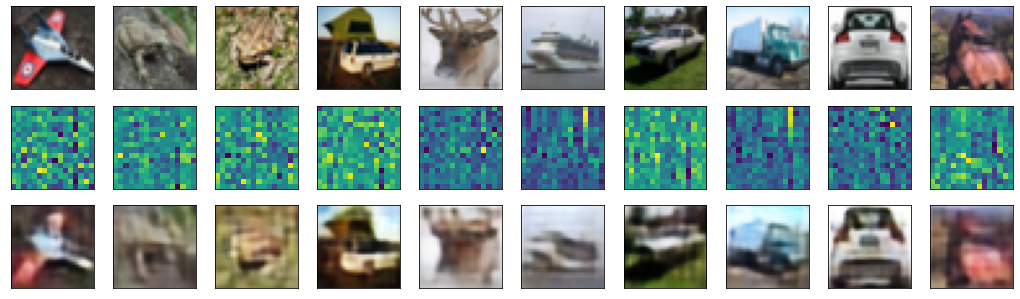

In [113]:
indices=np.random.randint(0,9999,size=10)
plt.figure(figsize=(18,18))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.imshow(X_test[indices[i]])
  plt.xticks(())
  plt.yticks(())

  plt.subplot(10,10,10+i+1)
  pred=encoder_model_new.predict(np.expand_dims(X_test[indices[i]],axis=0))
  plt.imshow(pred.reshape(16,16))
  plt.xticks(())
  plt.yticks(())

  plt.subplot(10,10,20+i+1)
  plt.imshow(decoder_model_new.predict(pred)[0])
  plt.xticks(())
  plt.yticks(())